# InstaBot  - Part 2

In [1]:
#importing all the required libraries
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.wait import WebDriverWait
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium import webdriver
from datetime import datetime, timedelta
import json
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Intializing the broswer
driver = webdriver.Chrome()

In [3]:
#Opening Instagram Web Page
driver.get('https://www.instagram.com/')

In [4]:
username = "SAMPLE USERNAME"
password = "SAMPLE PASSWORD"

In [5]:
# Intialising webdriverwait
wait = WebDriverWait(driver,30)

In [6]:
def login(username,password):
    try:
        #locating username box and assigning username
        username_box = driver.find_element("name","username")
        username_box.send_keys(username)
        
        # locating password box and assigning password
        password_box = driver.find_element("name","password")
        password_box.send_keys(password)

        # locating login button and clicking it 
        login_btn = wait.until(EC.visibility_of_element_located
                               (("xpath","//button[contains(@class,' _acan _acap _acas _aj1- _ap30')]")))
        login_btn.click()
        
        # Handling "Save login info" by clicking not now
        not_now_element = wait.until(EC.visibility_of_element_located(
            ("class name","_ac8f")))
        not_now_element.click()
        
        # Handling "Turn on notifications" by clicking not now
        not_now_element = wait.until(EC.visibility_of_element_located(
            ("xpath","//button[contains(@class,'_a9-- _ap36 _a9_1')]")))
        not_now_element.click()
        
    except:
        
        # Handling any encountered errors during this process
        print("Some Error Encountered")

In [7]:
login(username,password)

### 1. Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.
1. From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers
2. Now Find the number of posts these handles have done in the previous 3 days.
3. Depict this information using a suitable graph.

In [8]:
def Search(text):
    try:
        # locating Search icon
        search_icon =  wait.until(
                EC.presence_of_element_located(("xpath","/html/body/div[2]/div/div/div[2]/div/div/div[1]/div[1]/div[1]/div/div/div/div/div[2]/div[2]/span/div/a/div")
                                                   ))
        
        # clicking it to appear search icon
        search_icon.click()
        
        # Waiting and Locating Search bar to write text
        search_bar = wait.until(EC.presence_of_element_located(("xpath","//input[@aria-label='Search input']")))
        
        #Sending text "food" in Search Bar
        search_bar.send_keys(text)
        
        # waiting for dropdown menu appear
        time.sleep(5)
        
        dropdownMenu = wait.until(EC.presence_of_element_located(("xpath","//div[contains(@class,'x6s0dn4 x78zum5 xdt5ytf x5yr21d x1odjw0f x1n2onr6 xh8yej3')]")
                                  ))
        # Waiting for all instagram handle to appear
        instagram_handles = WebDriverWait(dropdownMenu,10).until(EC.presence_of_all_elements_located(
            ("xpath",".//span[contains(@class,'x1lliihq x1plvlek xryxfnj x1n2onr6 x193iq5w xeuugli x1fj9vlw x13faqbe x1vvkbs x1s928wv xhkezso x1gmr53x x1cpjm7i x1fgarty x1943h6x x1i0vuye xvs91rp x1s688f x5n08af x10wh9bi x1wdrske x8viiok x18hxmgj')]"))
          )
        
        # Collecting all instagram handle names excluding "#" tag
        names = [i.text for i in instagram_handles if len(i.text)>0 and i.text[0] != "#"]
        
        #closing search icon
        search_icon.click()
        
        # returning the list of instagram handles
        return names
        
    
    except:
        
        # Handling any encountered errors during this process
        print("Some Error Encountered")

In [9]:
# Collecting all instagram handle names that appear after typing food and choosing only first 10
names = Search("food")[:10]
print(names)

['dilsefoodie', 'foodtalkindia', 'foodiemahima', 'foodandwine', 'foodnetwork', 'rjash_original', 'food', 'dallasfoodtv', 'indian_foodblogs', 'food_lunatic']


In [10]:
def followersCounter(profileName):
    
    # Intialising a dictionary to store account name with their followers
    account_followers = {}
    
    # Iterating through profile names
    for name in profileName:
        
        # Opening the profile
        driver.get(f'https://www.instagram.com/{name}')

        # Waiting for profile to load properly
        time.sleep(3)

        # Finding number of followers
        followers = wait.until(EC.presence_of_element_located(
        ('xpath','/html/body/div[2]/div/div/div[2]/div/div/div[1]/div[1]/div[2]/div[2]/section/main/div/header/section/ul/li[2]/a/span/span'))
                              ).text
        
        # if there is "," in followers we will change it convert in into integer
        if ',' in followers:
            followers = followers.replace(',',"")
        else:
            # if K/M found in followers count then we will multiply them with respect to their integer value
            replace_elements = {'K': 1000, 'M': 1000000}
            
            # Converting K/M into integer values and getting number of followers in integers
            if followers[-1] in replace_elements:
                followers = float(followers[:-1]) * replace_elements[followers[-1]]
        
        # Assigning account names with their followers count
        account_followers[name] = int(followers)

        # Making profile stable after fetching followers
        time.sleep(1.5)
        
    # returning the dictionary
    return account_followers
    

In [11]:
account_followers = followersCounter(names)

In [12]:
account_followers = dict(sorted(account_followers.items(),key=lambda item : item[1]*-1)[:5])

In [13]:
top5Accounts = list(account_followers.keys()) 

In [14]:
print(top5Accounts)

['foodnetwork', 'foodandwine', 'dilsefoodie', 'foodtalkindia', 'food_lunatic']


In [15]:
def countHelper(nextbtn,count,numberofdays):
    
    while True:
        
        # Clicking next button
        nextbtn.click()
        
        # waiting for next post to open
        time.sleep(1.2)
        
         #getting date of the the post
        temp = wait.until(EC.presence_of_element_located(('class name','_aaqe')))

        #getting date in string format
        date_string = temp.get_attribute('datetime')

        #converting into date format
        date = datetime.strptime(date_string[0:19], "%Y-%m-%dT%H:%M:%S")

        # Fetching current year
        year = datetime.now().year
        # Fetching current month
        month = datetime.now().month
    
    
        # Checking the year
        if date.year == year and date.month == month:
            # If post is not  under current circumstances then return
            if (datetime.now() - date).days >= numberofdays:
                return count
            
            # If post is under current circumstances then incrase by 1
            elif (datetime.now() - date).days < numberofdays:
                count+=1

In [16]:
def countposts(name,numberofdays):
    
    # Opening the profile
    driver.get(f'https://www.instagram.com/{name}')
    
    # waiting for open
    time.sleep(2)
    
    # Fetching first post
    firstpost = wait.until(EC.presence_of_element_located(('class name','_aagw')))
    firstpost.click()
    
    # Waiting to open post
    time.sleep(1.2)
    
    count = 0
    
    #getting date of the the post
    temp = wait.until(EC.presence_of_element_located(('class name','_aaqe')))
            
    #getting date in string format
    date_string = temp.get_attribute('datetime')
        
    #converting into date format
    date = datetime.strptime(date_string[0:19], "%Y-%m-%dT%H:%M:%S")
        
    # Fetching current year
    year = datetime.now().year
    
    # Fetching current month
    month = datetime.now().month
    
    if date.year == year and date.month == month:
            # If post is not  under current circumstances then return
            if (datetime.now() - date).days >= numberofdays:
                    return count

            # If post is under current circumstances then incrase by 1
            elif (datetime.now() - date).days < numberofdays:
                    count+=1
            
                    
    # Fetching next button        
    next_btn = wait.until(EC.presence_of_element_located(
    ("class name",'_abl-')))
    
    newcount = countHelper(next_btn,count,numberofdays)
    
    return newcount

In [17]:
account_posts = {}
for name in top5Accounts:
    posts = countposts(name,3)
    account_posts[name] = posts

In [18]:
driver.back()

In [19]:
# Showing top 5 accounts with their posts
print(account_posts)

{'foodnetwork': 26, 'foodandwine': 14, 'dilsefoodie': 3, 'foodtalkindia': 1, 'food_lunatic': 2}


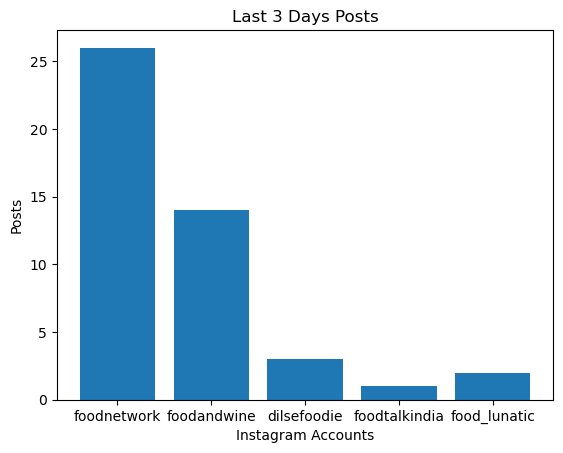

In [20]:
labels = list(account_posts.keys())
values = list(account_posts.values())

plt.bar(labels, values)
plt.xlabel('Instagram Accounts')
plt.ylabel('Posts')
plt.title('Last 3 Days Posts')
plt.show()


## 2.Your friend also needs a list of hashtags that he should use in his posts.
1. Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.
2. Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.
3. Create a csv file with two columns : the word and its frequency
4. Now, find the hashtags that were most popular among these bloggers
5. Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

In [21]:
top5Accounts

['foodnetwork', 'foodandwine', 'dilsefoodie', 'foodtalkindia', 'food_lunatic']

In [22]:
def contentHelper(nextbtn,contentstorelist,count,words):
    
    while count < 10:
        
        
        # Clicking next button
        nextbtn.click()
        
        # waiting for next post to open
        time.sleep(1.2)
        
        # Fetching the content of first post
        postText = wait.until(EC.presence_of_element_located(
        ('class name','_a9zs'))).text

        # storing in content list
        contentstorelist.append([postText])
        
        
        # Fetching the content of first post
        wordsfounder = wait.until(EC.presence_of_element_located(
        ('class name','_a9zs'))).text.split()

        # Collecting all words
        words.append(wordsfounder)

        # increasing count as we got our post
        count+=1
        
    return contentstorelist,words

In [23]:
def contentfetcher(profilename):
    
    # Storing all content
    content = []
    
    # for storing all words creating a list
    words = []
    
    # Opening the profile
    driver.get(f'https://www.instagram.com/{name}')
    
    # waiting for open
    time.sleep(2)
    
    # Fetching first post
    firstpost = wait.until(EC.presence_of_element_located(('class name','_aagw')))
    firstpost.click()
    
    # Waiting to open post
    time.sleep(1.2)
    
    # counting till we get 10 posts
    count = 0
    
    # Fetching the content of first post
    postText = wait.until(EC.presence_of_element_located(
    ('class name','_a9zs'))).text
    
    # storing in content list
    content.append([postText])
    
    # Fetching the content of first post
    wordsfounder = wait.until(EC.presence_of_element_located(
    ('class name','_a9zs'))).text.split()
    
    # Collecting all words
    words.append(wordsfounder)
    
    # increasing count as we got our post
    count+=1
    
    # Fetching next button        
    next_btn = wait.until(EC.presence_of_element_located(
    ("class name",'_abl-')))
    
    contentlist,wordslist = contentHelper(next_btn,content,count,words)
    
    return contentlist,wordslist
    

In [24]:
# Collecting all the 10 contents and their words
contents = []
wordscollect = []
for name in top5Accounts:
    content,word = contentfetcher(name)
    contents.append(content)
    wordscollect.append(word)

In [25]:
# getting back
driver.back()

In [26]:
# Showing all the 10 contents of each instagram handle
for i in contents:
    for j in i:
        print(j)
    print()

['Who will crumble under the pressure??\n\nFind out THIS Monday on the Season Premiere of #KidsBakingChampionship at 8|7c or @StreamOnMax. #StreamOnMax!']
["@weelicious is gearing up to face-off against @heytroyjohnson in the Grudge Match kitchen, but she has a secret weapon up her sleeve: Troy's wife! 🥦\n\n#SuperchefGrudgeMatch is all-new Tuesday at 9|8c or @StreamOnMax. #StreamOnMax"]
["Bacon, egg and cheese in flaky puff pastry? 🤯 We love to see it, @mollyyeh!\n\n@StreamOnMax for more of #GirlMeetsFarm. #StreamOnMax\n\nGet the recipe for Molly's Bacon, Egg and Cheese Turnovers at the link in our bio!"]
['Japanese New Year Mochi Soup is simple, comforting and traditionally served on January 1st to bring luck and long life in the new year 🍲\n\nGet the recipe for Ozoni at the link in bio!']
['Get a sneak peek at the dishes being served up in the Grudge Match kitchen by four superstar chefs from Flavortown!\n\n#SuperchefGrudgeMatch is all-new Tuesday at 9|8c or @StreamOnMax. #StreamOnMa

In [27]:
words_freq = {}
for i in wordscollect:
    for j in i:
        for w in j:
            w = w.strip()
            words_freq[w] = words_freq.get(w,0)+1

In [28]:
words_freq

{'Who': 2,
 'will': 3,
 'crumble': 1,
 'under': 1,
 'the': 81,
 'pressure??': 1,
 'Find': 3,
 'out': 2,
 'THIS': 2,
 'Monday': 1,
 'on': 11,
 'Season': 1,
 'Premiere': 1,
 'of': 36,
 '#KidsBakingChampionship': 2,
 'at': 23,
 '8|7c': 2,
 'or': 7,
 '@StreamOnMax.': 4,
 '#StreamOnMax!': 1,
 '@weelicious': 1,
 'is': 18,
 'gearing': 1,
 'up': 9,
 'to': 48,
 'face-off': 1,
 'against': 1,
 '@heytroyjohnson': 1,
 'in': 39,
 'Grudge': 2,
 'Match': 2,
 'kitchen,': 1,
 'but': 4,
 'she': 1,
 'has': 4,
 'a': 36,
 'secret': 1,
 'weapon': 1,
 'her': 2,
 'sleeve:': 1,
 "Troy's": 1,
 'wife!': 1,
 '🥦': 1,
 '#SuperchefGrudgeMatch': 2,
 'all-new': 3,
 'Tuesday': 2,
 '9|8c': 2,
 '#StreamOnMax': 4,
 'Bacon,': 2,
 'egg': 1,
 'and': 53,
 'cheese': 1,
 'flaky': 2,
 'puff': 2,
 'pastry?': 1,
 '🤯': 1,
 'We': 6,
 'love': 3,
 'see': 2,
 'it,': 1,
 '@mollyyeh!': 1,
 '@StreamOnMax': 1,
 'for': 26,
 'more': 5,
 '#GirlMeetsFarm.': 1,
 'Get': 9,
 'recipe': 10,
 "Molly's": 1,
 'Egg': 1,
 'Cheese': 1,
 'Turnovers': 1,
 '

In [29]:
df = pd.DataFrame(list(words_freq.items()),columns=['Words','Frequency'])
df.to_csv("WordsFrequency.csv",index=False)

In [30]:
# Showing all popular hashtags
hastags =  df[df['Words'].str.startswith('#')].sort_values(by='Frequency',ascending=False)
for i in hastags['Words']:
    print(i)

#dilsefoodie
#food
#love
#StreamOnMax
#tasty
#newbeginnings
#KidsBakingChampionship
#JustMarried
#NewBeginnings
#NewlyWeds
#GinOClock
#Love
#grateful
#bridetobe
#blessed
#bride
#newlyweds
#SuperchefGrudgeMatch
#weddingseason
#vanillapannacotta
#coffeepannacotta
#coffeepudding
#coconutdessert
#baileys
#mountains
#ForeverBeginsNow
#Blessed
#Grateful
#engagement
#ringceremony
#relatable
#engagementring
#newlyengaged
#snowfall
#travel
#contentcreator
#bridesmaids
#transition
#trending
#trend
#wedding
#foodie
#golgappe
#soojikahalwa
#recipevideo
#recipe
#pehlirasoi
#christmas
#merrychristmas
#Staycation
#Traveldiaries
#Travel
#Mountains
#Winters
#Manali
#sissuhimachal
#bestview
#pannacotta
#Sissu
#baileysdessert
#holidaydessert
#pudding
#hazelnutchocolate
#dhaba
#bharta
#explore
#kashmir
#sheermal
#DilSeDesi
#amritmohatsav
#75For75
#harghartiranga
#cholekulche
#streetfood
#Chocolate
#baileyspudding
#Hazelnuts
#IceCream
#CraftedForIndulgence
#Ad
#cocktailrecipes
#cocktailinspiration
#cocktai

In [31]:
# Fetching top 5 hastags
top5Hastagas = df[df['Words'].str.startswith('#')].sort_values(by='Frequency',ascending=False)[:5]
top5Hastagas

,Words,Frequency
514,#dilsefoodie,10
540,#food,8
1148,#love,6
47,#StreamOnMax,4
1245,#tasty,3


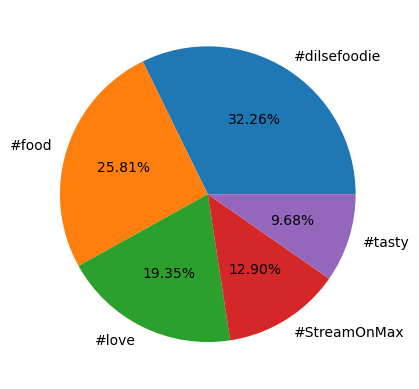

In [32]:
# Plotting pie chart of top 5 hashtags
plt.pie(top5Hastagas['Frequency'],labels=top5Hastagas['Words'],autopct="%0.2f%%")
plt.show()

### You need to also calculate average followers : likes ratio for the obtained handles. Followers : Likes ratio is calculated as follows:
1. Find out the likes of the top 10 posts of the 5 handles obtained earlier.
2. Calculate the average likes for a handle.
3. Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.
4. Create a bar graph to depict the above obtained information.

In [33]:
def likehelper(nextbtn,totalLikes,count):
    
    while count < 10:
        
        
        # Clicking next button
        nextbtn.click()
        
        # waiting for next post to open
        time.sleep(1.2)
        
        try:
            # finding number of likes
            likes = int(wait.until(EC.presence_of_element_located(
                                           ("xpath","//span[contains(@class,'x193iq5w xeuugli x1fj9vlw x13faqbe x1vvkbs xt0psk2 x1i0vuye xvs91rp x1s688f x5n08af x10wh9bi x1wdrske x8viiok x18hxmgj')]")
                        )).text.replace(",","").split()[0])
        except:
            # if error than means the post has no likes
            likes = 0
        
        # adding number of likes
        totalLikes += likes
    
        # increasing count as we got our post
        count+=1
        
    return totalLikes

In [34]:
def likefetcher(profilename):
    
    # creating a variable to count likes
    totalLikes = 0
    
    # Opening the profile
    driver.get(f'https://www.instagram.com/{name}')
    
    # waiting for open
    time.sleep(2)
    
    # Fetching first post
    firstpost = wait.until(EC.presence_of_element_located(('class name','_aagw')))
    firstpost.click()
    
    # Waiting to open post
    time.sleep(1.2)
    
    # counting till we get 10 posts
    count = 0
    
    try:
        # finding number of likes
        likes = int(wait.until(EC.presence_of_element_located(
                                       ("xpath","//span[contains(@class,'x193iq5w xeuugli x1fj9vlw x13faqbe x1vvkbs xt0psk2 x1i0vuye xvs91rp x1s688f x5n08af x10wh9bi x1wdrske x8viiok x18hxmgj')]")
                    )).text.replace(",","").split()[0])
    except:
        # if error that means post has 0 likes
        likes = 0
    
    # adding number of likes
    totalLikes += likes
    
    # increasing count as we got our post
    count+=1
    
    # Fetching next button        
    next_btn = wait.until(EC.presence_of_element_located(
    ("class name",'_abl-')))
    
    # getting total number of likes
    AllLikes = likehelper(next_btn,totalLikes,count)
    
    # returning total number of likes
    return AllLikes
    

In [35]:
# Collecting all the likess with their accounts
account_likes={}
for name in top5Accounts:
    account_likes[name] = likefetcher(name)

In [36]:
# Showing total number of likes of top 5 handles
account_likes

{'foodnetwork': 67330,
 'foodandwine': 17711,
 'dilsefoodie': 539445,
 'foodtalkindia': 1749,
 'food_lunatic': 84089}

In [37]:
# Calculating average number of likes of top 5 handles
average_likes_handle = {}
for i in account_likes:
    average_likes_handle[i] = account_likes[i]//10

In [38]:
# showing average number of likes of top 5 handles
average_likes_handle

{'foodnetwork': 6733,
 'foodandwine': 1771,
 'dilsefoodie': 53944,
 'foodtalkindia': 174,
 'food_lunatic': 8408}

In [39]:
ratio_likes_followers = {}
for i,j in zip(average_likes_handle,account_followers):
    if average_likes_handle[i]==0:
        ratio_likes_followers[i] = 0
    else:
        ratio_likes_followers[i] = account_followers[i]//average_likes_handle[i]

In [40]:
ratio_likes_followers

{'foodnetwork': 1901,
 'foodandwine': 2258,
 'dilsefoodie': 20,
 'foodtalkindia': 1775,
 'food_lunatic': 26}

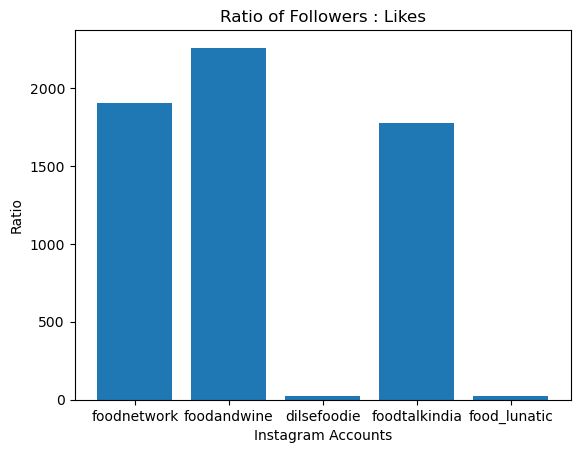

In [41]:
labels = list(ratio_likes_followers.keys())
values = list(ratio_likes_followers.values())

plt.bar(labels, values)
plt.xlabel('Instagram Accounts')
plt.ylabel('Ratio')
plt.title('Ratio of Followers : Likes')
plt.show()


In [42]:
driver.back()